# ITM 891 - Part 3
### Data Visualization 

In [1]:
%matplotlib inline

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline, BSpline

Note: Please change filename directory before executing next cell

In [4]:
imdb = pd.read_csv('/Users/syedkashif9786/Documents/Michigan State University/Large Scale Data Analysis/Imdb_processed.csv')

In [5]:
# Sorting imdb DataFrame by 'budget' and dropping 'index' column
imdb = imdb.sort_values('budget')
imdb.reset_index(inplace = True)
imdb = imdb.drop(columns = ['index'])

### Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Movie Duration (in minutes)')

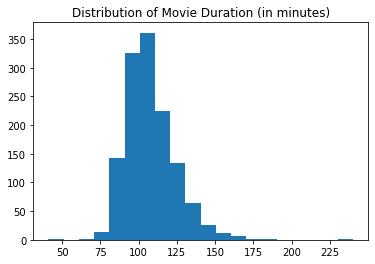

In [9]:
# Duration histogram
plt.hist(imdb['duration'], bins = 20)
plt.title('Distribution of Movie Duration (in minutes)')

Text(0.5, 1.0, 'Distribution of Movies by Release year')

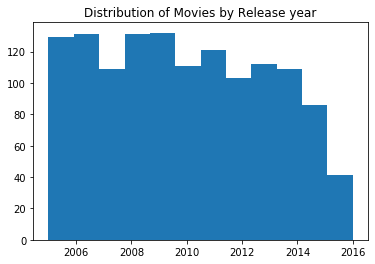

In [11]:
# Year histogram
plt.hist(imdb['title_year'], bins = 12)
plt.title('Distribution of Movies by Release year')

Text(0.5, 1.0, 'Distribution of ROI (Return on Investment) by content rating')

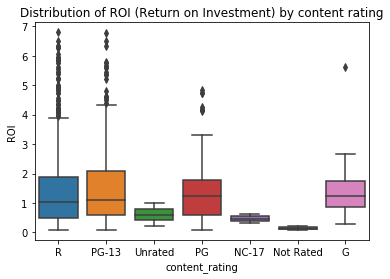

In [13]:
# ROI boxplot
sns.boxplot(x="content_rating", y="ROI", data = imdb)
plt.title('Distribution of ROI (Return on Investment) by content rating')

## The BUSINESS Question
Does the movie industry follow the law of diminishing returns?

To answer this, I have adopted the following methodology:
* Binned the dataset in 8 and 10 equal parts
* Calculated mean of 'budget' and 'gross' for each bin
* Plotting 'budget' vs 'gross' lineplot

### Binning the dataset in 8 equal parts

In [14]:
# Binning in dataset 8 equally sized parts
index_bins = []
imdb_size = imdb.shape[0]
for i in range(0,8):
    idx_range = [round(imdb_size * i/10), round(imdb_size * (i+1)/10)]
    index_bins.append(idx_range)

In [15]:
# Calculating mean for 'budget' and 'gross' columns for each bin
agg_bg_mat = np.zeros((8,2))
for i in range(0,8):
    imdb_bin = imdb.loc[index_bins[i][0]:(index_bins[i][1]-1),]
    agg_bg_mat[i,0] = np.mean(imdb_bin['budget'])
    agg_bg_mat[i,1] = np.mean(imdb_bin['gross'])

Text(0, 0.5, 'Gross')

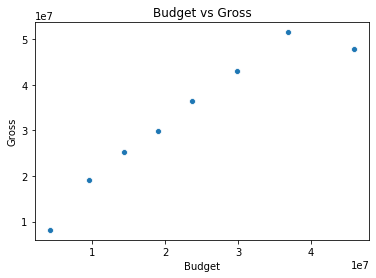

In [18]:
# Plotting scatterplot
sns.scatterplot(x = agg_bg_mat[:,0], y = agg_bg_mat[:,1])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

Text(0, 0.5, 'Gross')

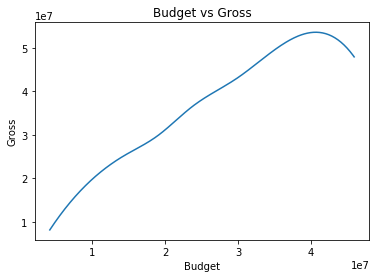

In [20]:
# Plotting a smooth lineplot
xnew = np.linspace(agg_bg_mat[:,0].min(), agg_bg_mat[:,0].max(), 300)  
spl = make_interp_spline(agg_bg_mat[:,0], agg_bg_mat[:,1], k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew,power_smooth)
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

### Binning the dataset in 10 equal parts

In [32]:
# Binning in dataset 10 equally sized parts
index_bins = []
imdb_size = imdb.shape[0]
for i in range(0,10):
    idx_range = [round(imdb_size * i/10), round(imdb_size * (i+1)/10)]
    index_bins.append(idx_range)

In [33]:
# Calculating mean for 'budget' and 'gross' columns for each bin
agg_bg_mat = np.zeros((10,2))
for i in range(0,10):
    imdb_bin = imdb.loc[index_bins[i][0]:(index_bins[i][1]-1),]
    agg_bg_mat[i,0] = np.mean(imdb_bin['budget'])
    agg_bg_mat[i,1] = np.mean(imdb_bin['gross'])

Text(0, 0.5, 'Gross')

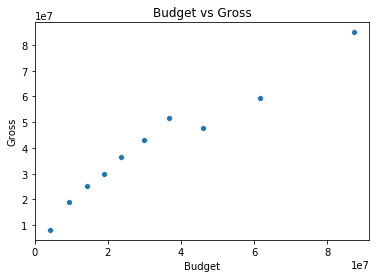

In [34]:
# Plotting scatterplot
sns.scatterplot(x = agg_bg_mat[:,0], y = agg_bg_mat[:,1])
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

Text(0, 0.5, 'Gross')

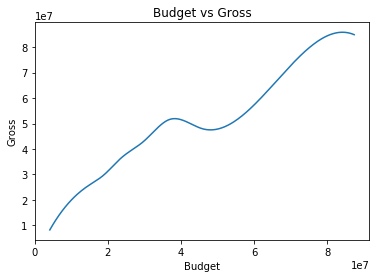

In [35]:
# Plotting a smooth lineplot
xnew = np.linspace(agg_bg_mat[:,0].min(), agg_bg_mat[:,0].max(), 300)  
spl = make_interp_spline(agg_bg_mat[:,0], agg_bg_mat[:,1], k=3)  # type: BSpline
power_smooth = spl(xnew)
plt.plot(xnew,power_smooth)
plt.title('Budget vs Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')

### Some Genre-wise EDA

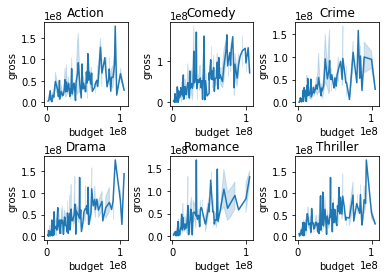

In [22]:
# Plotting budget vs gross graph for each genre
genre_list = list(imdb.columns[15:21])
for i in range(len(genre_list)):
    imdb_genre = imdb.loc[imdb[genre_list[i]] == 1,]
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.6)
    sns.lineplot(x = 'budget', y = 'gross', data = imdb_genre).set_title(genre_list[i])

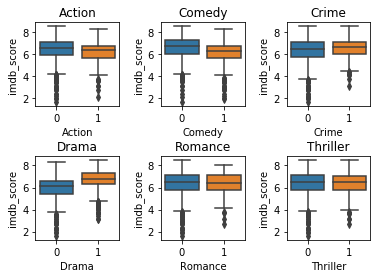

In [23]:
# Genre wise Imdb score distribution
genre_list = list(imdb.columns[15:21])
for i in range(len(genre_list)):
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.6)
    sns.boxplot(x = genre_list[i], y = 'imdb_score', data = imdb).set_title(genre_list[i])

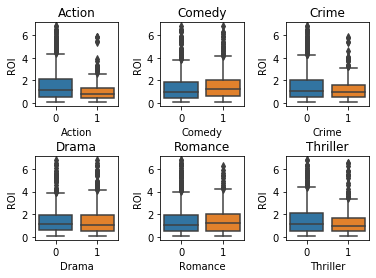

In [24]:
# Genre wise ROI distribution
genre_list = list(imdb.columns[15:21])
for i in range(len(genre_list)):
    plt.subplot(2,3,i+1)
    plt.subplots_adjust(wspace = 0.5, hspace = 0.6)
    sns.boxplot(x = genre_list[i], y = 'ROI', data = imdb).set_title(genre_list[i])